# Name: Abdul Rehman
# Roll Number: 263179034


# Programming Assignment 2: Logistic Regression

In this assignment, you will implement a Logistic Regression model to classify customer sentiment based on textual reviews.

## Objectives

1. Preprocess textual data by cleaning and preparing features.
2. Implement Logistic Regression using `sklearn`.
3. Evaluate model performance using appropriate metrics.
4. Understand the workflow of a machine learning model from data preprocessing to prediction.

## Dataset Description

We will use the `reviews.csv` dataset, which includes the following columns:

- **Clothing ID**: An identifier for each clothing item.
- **Review Text**: Customer feedback (can be missing).
- **Rating**: Customer-provided ratings (1-5).



In [1]:
# Essential imports for Data Preprocessing and Modeling
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


### Step 1: Load the Data

1. Use `pandas` to load the dataset (`reviews.csv`).
2. Display the first few rows to understand its structure.


In [2]:
# Load the dataset
df = pd.read_csv("reviews.csv")
# Display first few rows
print(df.head())

   Clothing ID                                        Review Text  Rating
0          767  Absolutely wonderful - silky and sexy and comf...       4
1         1080  Love this dress!  it's sooo pretty.  i happene...       5
2         1077  I had such high hopes for this dress and reall...       3
3         1049  I love, love, love this jumpsuit. it's fun, fl...       5
4          847  This shirt is very flattering to all due to th...       5



### Step 2: Data Preprocessing

1. Extract the `Review Text` and `Rating` columns.
2. For `Null values` - Fill null Review Text with an `empty string`

3. Clean the `Review Text`:
    - Remove special characters and numbers.
    - Convert all text to lowercase.
    - Tokenize and remove stop words.

**Hints:**
- Use libraries like `re` and `nltk` for text cleaning.
- Check for null values in `Review Text` and handle them (e.g., drop or fill).
- Ensure all entries are `strings`



In [3]:
import nltk
nltk.download('punkt')      # For tokenization
nltk.download('punkt_tab')  # For tokenization
nltk.download('stopwords')  # For stop words
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Code here

# Extract 'Review Text' and 'Rating' columns
df = df[['Review Text', 'Rating']]

# Fill null values in 'Review Text' with an empty string
df['Review Text'] = df['Review Text'].fillna('')

# Function to clean text
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back to a single string
    return ' '.join(filtered_tokens)

# Apply cleaning function to 'Review Text'
df['Cleaned Review'] = df['Review Text'].apply(clean_text)

# Display the first few rows of the cleaned data
print(df.head())

<ipython-input-4-1a2ba2405b65>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Text'] = df['Review Text'].fillna('')


                                         Review Text  Rating  \
0  Absolutely wonderful - silky and sexy and comf...       4   
1  Love this dress!  it's sooo pretty.  i happene...       5   
2  I had such high hopes for this dress and reall...       3   
3  I love, love, love this jumpsuit. it's fun, fl...       5   
4  This shirt is very flattering to all due to th...       5   

                                      Cleaned Review  
0        absolutely wonderful silky sexy comfortable  
1  love dress sooo pretty happened find store im ...  
2  high hopes dress really wanted work initially ...  
3  love love love jumpsuit fun flirty fabulous ev...  
4  shirt flattering due adjustable front tie perf...  



### Step 3: Feature Extraction

1. Convert the processed text into numerical features using methods like:
   - Bag-of-Words (`CountVectorizer`).

2. Split the data into training and testing sets.
   - Use the 80:20 for train and test and random_state=42

In [5]:
# Code here

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform 'Cleaned Review' into Bag-of-Words features
X = vectorizer.fit_transform(df['Cleaned Review'])

# Use 'Rating' as the target variable
y = df['Rating']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4: Implement Logistic Regression

Train a Logistic Regression model on the training data.<br>
To implement a supervised machine learning algorithm we will use [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from sklearn


In [6]:
# Train a Logistic Regression model on the training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Step 5: Evaluate Model Performance

1. Use the trained model to make predictions on the test data.
2. Evaluate the model's performance using:
   - Accuracy.
   - Precision, Recall, F1-score.
   - Classification report
   - Confusion Matrix.

**Hint:**
- For Multiclass classification - use 'macro' or 'weighted' for averaging

Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.18      0.21       153
           2       0.31      0.25      0.28       317
           3       0.39      0.32      0.35       620
           4       0.42      0.35      0.38      1017
           5       0.75      0.86      0.80      2591

    accuracy                           0.62      4698
   macro avg       0.43      0.39      0.41      4698
weighted avg       0.59      0.62      0.60      4698

Accuracy: 0.62
Precision: 0.59
Recall: 0.62
F1 Score: 0.60


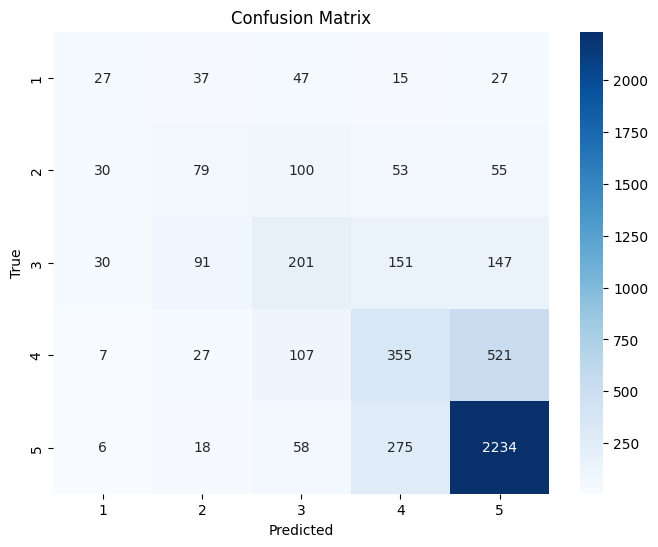

In [8]:
# Code here

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Step 6: Experiment and Conclude

1. Reflect on how preprocessing impacts model performance.
2. Write a brief conclusion summarizing your findings.


In [11]:
# Add your conclusion


Preprocessing Impact:
The text preprocessing steps — cleaning the reviews, removing noise, and ensuring consistent formatting — definitely helped make the data easier for the model to work with. However, the results show that while preprocessing improved performance, there's still room for improvement, especially for ratings with fewer examples.

Model Performance:
The Logistic Regression model achieved an accuracy of 62%, with a weighted average precision of 59%, recall of 62%, and an F1-score of 60%. The model performed quite well for 5-star ratings (precision of 75% and recall of 86%), likely because this class has the most data. However, performance drops significantly for lower ratings (1-star and 2-star), where precision and recall are below 35%. This suggests that the model struggles with predicting these ratings due to class imbalance.

Key Observations:

The model tends to favor predicting higher ratings (especially 5-star) because of the larger number of examples in this class.
Lower ratings (1, 2, and 3 stars) are underrepresented, making it harder for the model to learn these patterns effectively.